In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series,DataFrame
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of Houses')

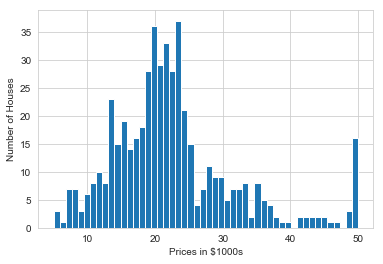

In [6]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0.5, 0, '# of Rooms')

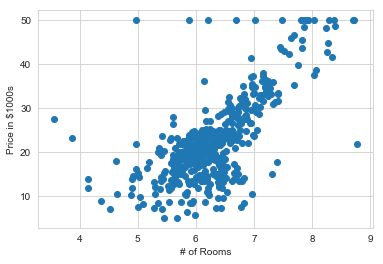

In [7]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('# of Rooms')

In [8]:
df_boston = DataFrame(boston.data)

df_boston.columns = boston.feature_names

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_boston['Price'] = boston.target

In [10]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


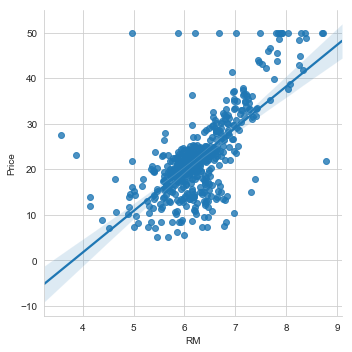

In [11]:
sns.lmplot('RM','Price',data=df_boston)

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [21]:
lreg = LinearRegression()

In [22]:
X_multi = df_boston.drop('Price',1)

Y_target = df_boston.Price

In [23]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print ('The estimated intercept coefficient is %.2f' %lreg.intercept_)

print ('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [28]:
df_coeff = DataFrame(df_boston.columns)
df_coeff.columns = ['Features']

df_coeff['Coefficient_Estimate'] = Series(lreg.coef_)

df_coeff

,Features,Coefficient_Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [34]:
# test/train split function is now in sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,df_boston.Price)

In [35]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [36]:
lreg =  LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [39]:
print("Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2))

print("Fit a model X_train, and calculate the MSE with X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 47.75
Fit a model X_train, and calculate the MSE with X_test and Y_test: 31.28


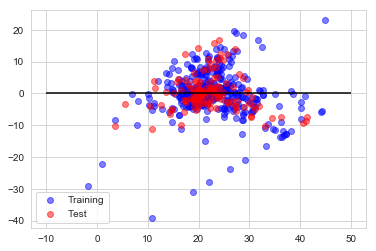

In [44]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training', 'Test'),loc='lower left')